# Torsion elastique

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from uncertainties import unumpy as unp
from uncertainties import ufloat, umath
from options import *
from constants import *

nom_vals = unp.nominal_values
std_devs = unp.std_devs

mpl.rcParams.update(rcParams)

In [2]:
def load(filename: str):
    return pd.read_csv(filename)

In [3]:
laiton = load('../data/laiton_torsion_vs_masse.csv')
acier = load('../data/acier_torsion_vs_masse.csv')
magnesium = load('../data/magnesium_torsion_vs_masse.csv')

In [4]:
def fit_line(data):
    masse_sus = unp.uarray(data["Masse [g]"], delta_masse)
    start = unp.uarray(data["Start [cm]"], delta_regle_laser)
    stop = unp.uarray(data["Stop [cm]"], delta_regle_laser)
    deviation = stop - start

    theta = 0.5 * unp.arctan(deviation / distance_regle)
    P = masse_sus * g
    coefs, cov = np.polyfit(nom_vals(P), nom_vals(theta), 1, cov=True)
    coefs_err = unp.uarray(coefs, np.sqrt(np.diag(cov)))
    fit_func = np.poly1d(coefs)
    return coefs_err, fit_func


In [5]:
def plot_data(data, **kwargs):
    masse_sus = unp.uarray(data["Masse [g]"], delta_masse)
    start = unp.uarray(data["Start [cm]"], delta_regle_laser)
    stop = unp.uarray(data["Stop [cm]"], delta_regle_laser)
    deviation = stop - start

    theta = 0.5 * unp.arctan(deviation / distance_regle)
    P = masse_sus * g

    plt.scatter(nom_vals(P), nom_vals(theta), **kwargs)

In [6]:
def plot_and_print_fit(data, **kwargs):
    coefs_err, fit_func = fit_line(data)
    print(f"Pente: {coefs_err[0]:.2ueP} ({coefs_err[0]:.2ueL})")
    masse_sus = unp.uarray(data["Masse [g]"], delta_masse)
    P = masse_sus * g
    plt.plot(nom_vals(P), fit_func(nom_vals(P)), '--', label='$y = ({:.1ueL})x + ({:.1ueL})$'.format(*coefs_err), **kwargs)

Laiton (longueur = 25 cm)
Pente: (6.47±0.11)×10⁻⁶ (\left(6.47 \pm 0.11\right) \times 10^{-6})
Acier (longueur = 25 cm)
Pente: (2.564±0.015)×10⁻⁶ (\left(2.564 \pm 0.015\right) \times 10^{-6})
Magnesium (longueur = 25 cm)
Pente: (9.57±0.12)×10⁻⁷ (\left(9.57 \pm 0.12\right) \times 10^{-7})


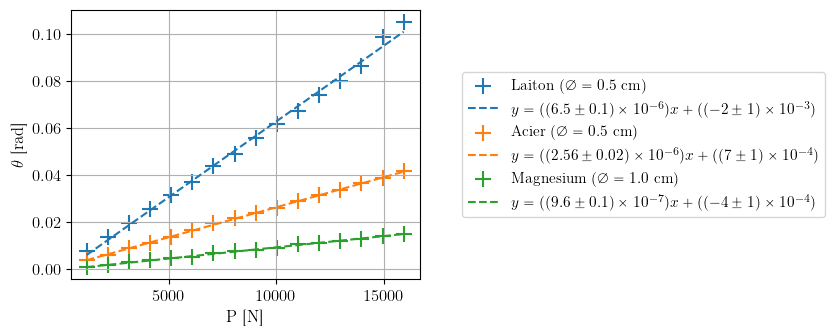

In [9]:
print(f'Laiton (longueur = {laiton["Longueur [cm]"][0]:.0f} cm)')
plot_data(laiton, label=f'Laiton ($\\diameter={epaisseur_tige_laiton.n:.1f}$ \\si{{\\centi\\meter}})')
plot_and_print_fit(laiton)
print(f'Acier (longueur = {acier["Longueur [cm]"][0]:.0f} cm)')
plot_data(acier, label=f'Acier ($\\diameter={epaisseur_tige_acier.n:.1f}$ \\si{{\\centi\\meter}})')
plot_and_print_fit(acier)
print(f'Magnesium (longueur = {magnesium["Longueur [cm]"][0]:.0f} cm)')
plot_data(magnesium, label=f'Magnesium ($\\diameter={epaisseur_tige_magnesium.n:.1f}$ \\si{{\\centi\\meter}})')
plot_and_print_fit(magnesium)
plt.xlabel(r'P [\si{\newton}]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend(loc="center left", bbox_to_anchor=(1.1, 0.5))
plt.grid()
plt.savefig('../figures/methode_statique_masse.pdf')